# Transfer Learning with MobileNet
The following code implements transfer learning with MobileNetV2 on the Cats vs. Dogs dataset, which contains 23,262 images of cats and dogs.

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import warnings
warnings.filterwarnings('ignore')

## 1 Loading the Data

In [2]:
# Loading the data
train_data, test_data = tfds.load('cats_vs_dogs',split=['train[:75%]','train[75%:]'],batch_size=32,shuffle_files=True,as_supervised=True)
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [3]:
# Visualising an example
itr = train_data.as_numpy_iterator()
img,cls = next(itr)
print('Shape:',img.shape)

Shape: (32, 500, 500, 3)


Class: 0


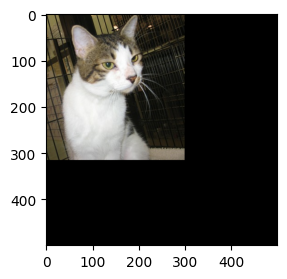

In [4]:
print('Class:',cls[0])
fig,ax = plt.subplots(1,1,figsize=[3,3])
ax.imshow(img[0])
fig.show()

## 2 Building the Model

In [5]:
def mobilenet_v2(input_shape=(None,None,3), classes=2):
    #Input layer
    X_input = tf.keras.Input(input_shape)

    # Preprocessing layers
    X = tf.keras.layers.Resizing(150,150)(X_input)
    X = tf.keras.layers.Rescaling(1./255)(X)

    # MobileNetV2 layer
    base_model = tf.keras.applications.MobileNetV2(include_top=False)
    base_model.trainable = False
    X = base_model(X,training=False)

    # Final layer
    X = tf.keras.layers.GlobalAveragePooling2D()(X)
    X = tf.keras.layers.Dense(1)(X)

    return tf.keras.Model(X_input,X)

In [6]:
model = mobilenet_v2()

In [7]:
# Visualising the model architecture
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 resizing (Resizing)         (None, 150, 150, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, None, None, 1280   2257984   
 tional)                     )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 1281  

## 3 Training the Model

In [8]:
# Specifying the training configuration
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=[tf.keras.metrics.BinaryAccuracy()])

In [9]:
# Fitting the model on the training data
model.fit(x=train_data,epochs=3)

Epoch 1/3
546/546 [==============================] - 39s 46ms/step - loss: 0.2232 - binary_accuracy: 0.8938
Epoch 2/3
546/546 [==============================] - 25s 46ms/step - loss: 0.1742 - binary_accuracy: 0.9179
Epoch 3/3
546/546 [==============================] - 21s 39ms/step - loss: 0.1644 - binary_accuracy: 0.9243


## 4 Fine-tuning the Model

In [10]:
# Specifying the training configuration
model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=[tf.keras.metrics.BinaryAccuracy()])

In [11]:
# Fine-tuning the model on the training data
model.fit(train_data,epochs=3)

Epoch 1/3
546/546 [==============================] - 79s 89ms/step - loss: 0.1350 - binary_accuracy: 0.9391
Epoch 2/3
546/546 [==============================] - 49s 89ms/step - loss: 0.0808 - binary_accuracy: 0.9650
Epoch 3/3
546/546 [==============================] - 49s 89ms/step - loss: 0.0528 - binary_accuracy: 0.9785


## 5 Evaluating the Model

In [12]:
# Calculating the test loss and accuracy
model.evaluate(test_data)

182/182 [==============================] - 9s 44ms/step - loss: 0.1269 - binary_accuracy: 0.9472


[0.12691786885261536, 0.9472146034240723]

## 6 Conclusion
Thus, final model has over 2 million parameters and achieved training and test accuracies of 97.85% and 94.72%, respectively.